In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sys
import pathlib

dir_path = pathlib.Path(os.path.abspath('')).resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]

PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat/OpenFormat-Public'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *

/home/haoyuq/EvaluationOfColumnarFormats/OpenFormat/OpenFormat-Public/python/encoding_size


In [6]:
width = pd.read_csv(f'{PROJ_SRC_DIR}/python/outputs/encoding_size_width_20240306_171928.csv', header=0)
sort = pd.read_csv(f'{PROJ_SRC_DIR}/python/outputs/encoding_size_sort_20240306_083246.csv', header=0)
zipf = pd.read_csv(f'{PROJ_SRC_DIR}/python/outputs/encoding_size_zipf_20240306_062543.csv', header=0)
car = pd.read_csv(f'{PROJ_SRC_DIR}/python/outputs/encoding_size_car_20240306_075648.csv',header=0)

In [8]:
combine = pd.concat([width, sort, zipf, car])

In [13]:
df_pivot = combine.pivot_table(index=['type', 'param', 'feature'], columns='file', values='size').reset_index()

In [16]:
df_pivot

file,type,param,feature,btrblocks,orc,parquet
0,float,0.0001,car,16172920,16610035,14534096
1,float,0.0010,car,24737303,32352753,21093983
2,float,0.0100,car,48637954,34508754,31922429
3,float,0.0100,sort,79985189,92135764,95888010
4,float,0.0100,zipf,88503186,96443342,104431257
...,...,...,...,...,...,...
86,string,25.0000,width,175992727,107856152,114309452
87,string,50.0000,width,329996472,191352349,197681317
88,string,100.0000,width,643014684,358248283,363289091
89,string,250.0000,width,571074405,4108417539,3927284971


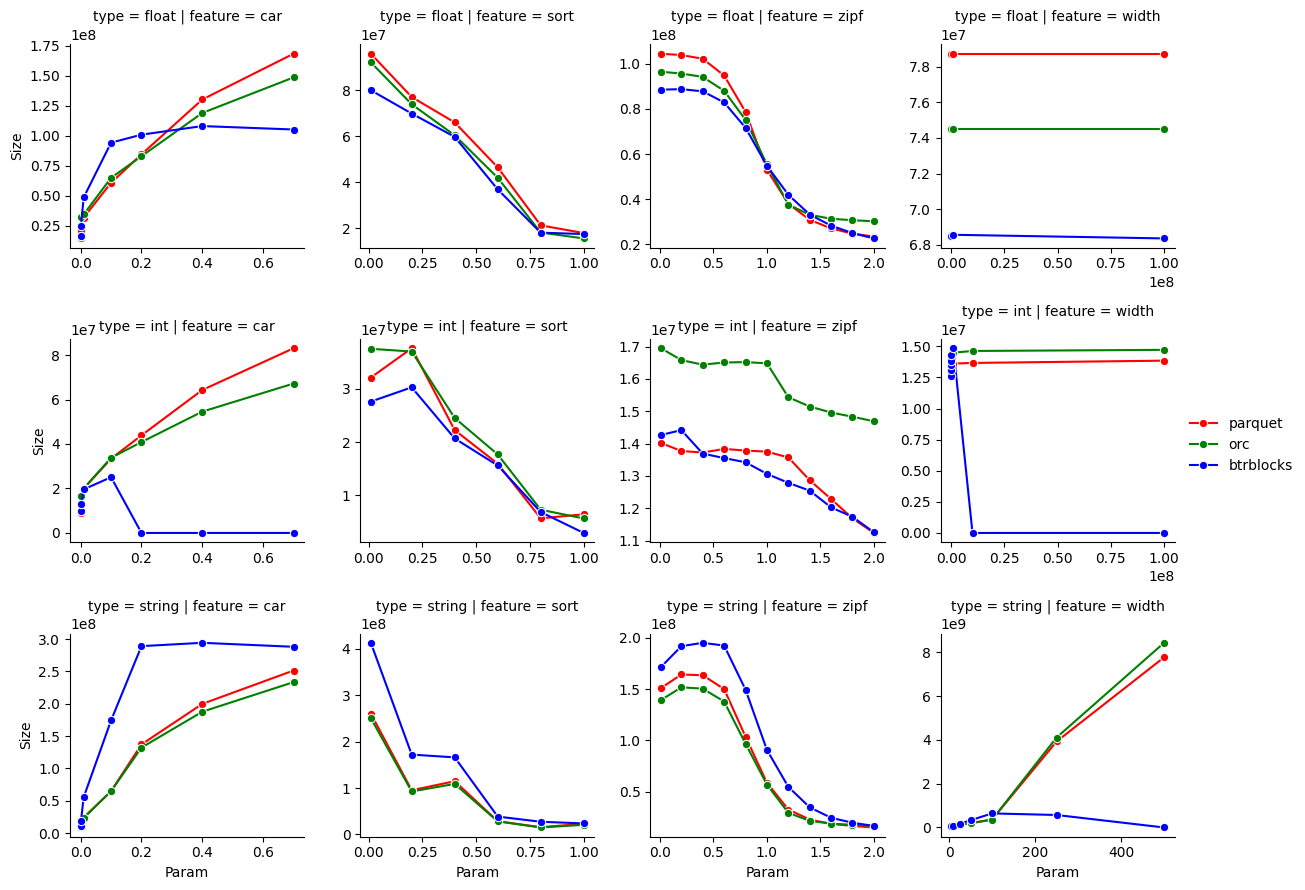

In [28]:
g = sns.FacetGrid(df_pivot, row="type", col="feature", sharex=False, sharey=False)
g = g.map(sns.lineplot, 'param', 'parquet', marker="o", label='parquet', color='r')
g = g.map(sns.lineplot, 'param', 'orc', marker="o", label='orc', color='g')
g = g.map(sns.lineplot, 'param', 'btrblocks', marker="o", label='btrblocks', color='b')
g.add_legend()

# Adjusting layout
g.set_axis_labels("Param", "Size")

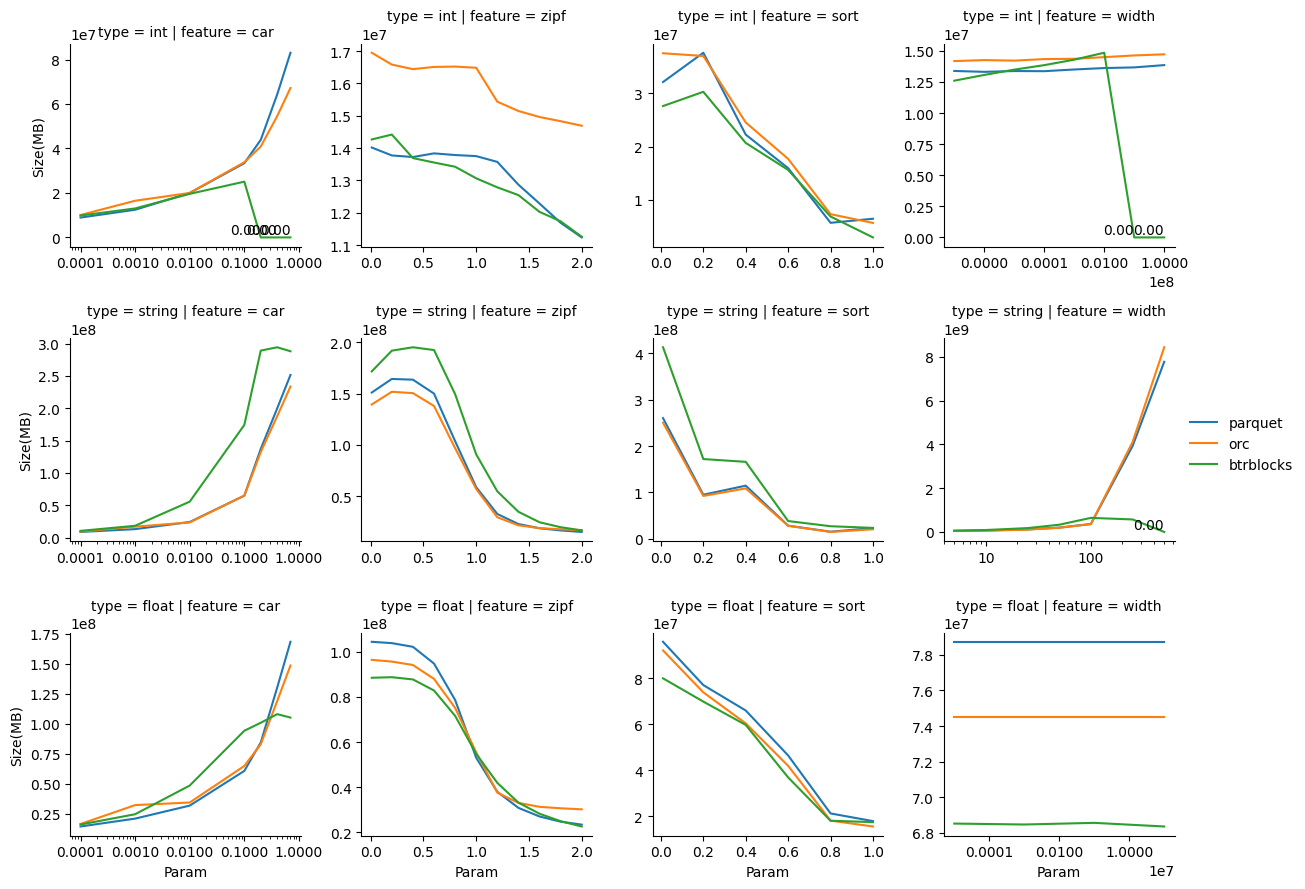

In [46]:
import matplotlib.ticker as ticker

def highlight_btrblocks(data, **kw):
    filtered_data = data[data['file'] == 'btrblocks']
    if not filtered_data.empty:
        # Plot each point and annotate it with its size value
        for _, row in filtered_data.iterrows():
            # Annotation position adjustment may be necessary for clarity
            if row['size'] == 0:
                plt.text(row['param'], row['size'], f"{row['size']:.2f}", color='black', ha='right', va='bottom')

g = sns.FacetGrid(combine, row="type", col="feature", sharex=False, sharey=False, row_order=['int','string','float'], col_order=['car','zipf','sort','width'])
g = g.map_dataframe(sns.lineplot, x='param', y='size', hue='file')
g = g.map_dataframe(highlight_btrblocks)
g.add_legend()

car_ticks = [0.0001, 0.001, 0.01, 0.1, 1]
zipf_ticks = [0.0, 0.5, 1.0, 1.5, 2.0]
sort_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
width_ticks = [[10**2, 10**4, 10**6, 10**8], [10**1,10**2], [10**3, 10**5, 10**7]]

file = 0
cnt = 0
t_cnt = 0
ticks = [car_ticks, zipf_ticks, sort_ticks, width_ticks]
feature = ['car','zipf','sort','width']
type = ['int', 'string', 'float']
for ax in g.axes.flat:
    # For x ticks
    if file==0 or file==3:
        ax.set_xscale('log')
    if file==3:
        ax.set_xticks(ticks[file][cnt])
        cnt+=1
    else:
        ax.set_xticks(ticks[file])
    ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    file += 1
    if file >=4:
        file -= 4
        t_cnt += 1

# Adjusting layout
g.set_axis_labels("Param", "Size(MB)")